<h1>Simples Linear Model<h/1>

The objetive of this notebook is to explore the fundamentals of simple linear model, in their basic form the linear regression to explore the linear relation between two variables, one to call explanation variable represented by axis X and predictor variable represented by axis y. Here there is an resume of that principles for analysis of regression.
    
1. Must be represented cause and effect relationship

2. After to decide that direction of variables for cause and effect is necessary to describe the relation by mathematic function: $y=f(x)$

3. The basic form of linear regression is the simple linear function: $f(x) = ax+b$ and formal way can write as $Y = \beta_0 +\beta_1X$ where $\beta_0$ is the intercept and $\beta_1$ is the inclination. The $\beta_0$ and $\beta_1$ are two parameters that resulted in equation of the straight line.

4. The inclination of straight line is defined as $\frac{\Delta Y}{\Delta X}$, where $\Delta Y$ is variation the $Y$ in relation variation in $X$.

5. The formulation mathematical for differents observations resulted in differents values of $Y$ as results this, is necessary additional term of equation transformed in statistical formulation: $Y_i = \beta_0 + \beta_iX_i + \varepsilon_i$, where $i$ is the quantity of measures ($i$ = 1 until $n$).

6. The way for otimization is using OLS <b>(ordinared least squared)</b> defined as $d_i^2=(Y_i-\hat{Y_i})^2$ but we need that sum of alls values for adjusted the values, so the equation to evolued for: $$SQR=\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2$$

7. The hypothesis null is: $Y_i=\beta_0+\varepsilon$ where $x=0$

8. The alternative hipothesis is: $Y_i = \beta_0 + \beta_iX_i + \varepsilon$

<div>
source of data: https://www.kaggle.com/datasets/saquib7hussain/experience-salary-dataset
</div>

<h2>Import dependencies</h2>

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import numpy as np 
from statsmodels.iolib.summary2 import summary_col
from statsmodels.formula.api import ols
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import warnings

<h2>Settings</h2>

In [2]:
warnings.filterwarnings("ignore")

def setup_matplot(titlesize=int(14),labelsize=int(12)):
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [8,6]
    plt.rcParams['figure.titlesize'] = titlesize
    plt.rcParams['figure.labelsize'] = labelsize
    return(plt)
plt = setup_matplot()

<h3>Enter of data</h3>

In [3]:
df = pd.read_csv("../database/experience_salary.csv", 
                 delimiter=',')

df.head(3)

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255


In [4]:
df.columns

Index(['exp(in months)', 'salary(in thousands)'], dtype='object')

In [5]:
df = df.rename(
    columns={'exp(in months)':'time',
             'salary(in thousands)':'salary'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    1000 non-null   float64
 1   salary  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [7]:
display(df)

,time,salary
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


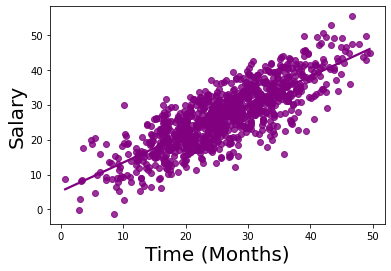

In [8]:
sns.regplot(data=df, x='time', y='salary', ci=False, color='purple')
plt.xlabel('Time (Months)', fontsize=20)
plt.ylabel('Salary', fontsize=20)
plt.show()

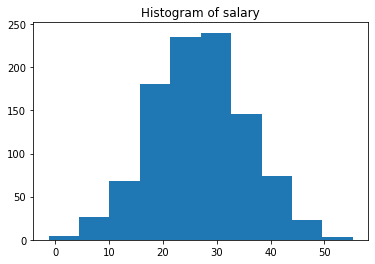

In [9]:
plt.hist(df['salary'])
plt.title('Histogram of salary')
plt.show()

<h2>Applying of model</h2>

In [10]:
# Model of estimate

model = sm.OLS.from_formula("salary ~time", df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1917.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          1.51e-234
Time:                        17:23:52   Log-Likelihood:                -3062.3
No. Observations:                1000   AIC:                             6129.
Df Residuals:                     998   BIC:                             6138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1987      0.518     10.034      0.0

In [11]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.657    
Dependent Variable: salary           AIC:                6128.5435
Date:               2023-11-20 17:23 BIC:                6138.3590
No. Observations:   1000             Log-Likelihood:     -3062.3  
Df Model:           1                F-statistic:        1917.    
Df Residuals:       998              Prob (F-statistic): 1.51e-234
R-squared:          0.658            Scale:              26.807   
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     5.1987     0.5181   10.0341   0.0000   4.1820   6.2154
time          0.8228     0.0188   43.7873   0.0000   0.7860   0.8597
------------------------------------------------------------------
Omnibus:              3.580         Durbin-Watson:           1.907
Pro

In [12]:
model.params

Intercept    5.198719
time         0.822847
dtype: float64

<h2>Analysis of Variance</h2>

In [13]:
model_aov = ols("salary ~time", data=df).fit()

print(sm.stats.anova_lm(model_aov))
print(sm.stats.anova_lm(model_aov, typ=2))
print(sm.stats.anova_lm(model_aov, typ=3))

             df        sum_sq       mean_sq            F         PR(>F)
time        1.0  51398.031222  51398.031222  1917.325823  1.514654e-234
Residual  998.0  26753.530646     26.807145          NaN            NaN
                sum_sq     df            F         PR(>F)
time      51398.031222    1.0  1917.325823  1.514654e-234
Residual  26753.530646  998.0          NaN            NaN
                 sum_sq     df            F         PR(>F)
Intercept   2699.017494    1.0   100.682766   1.224271e-22
time       51398.031222    1.0  1917.325823  1.514654e-234
Residual   26753.530646  998.0          NaN            NaN


<h2>Extraction fitted values and residuals</h2>

In [14]:
df['yhat'] = model.fittedvalues
df['error'] = model.resid

df.head(3)

,time,salary,yhat,error
0,18.290293,16.521825,20.248825,-3.727000
1,17.023407,11.666234,19.206372,-7.540138
2,26.343613,23.167255,26.875473,-3.708218


<h2>Verify prediction</h2>

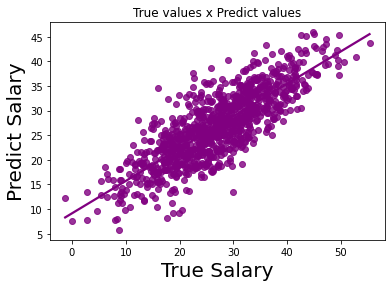

In [15]:
# plt.figure(figsize=(10,8))
sns.regplot(data=df, x='salary', y='yhat', ci=False, color='purple')
plt.xlabel('True Salary', fontsize=20)
plt.ylabel('Predict Salary', fontsize=20)
plt.title('True values x Predict values')
# plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show()

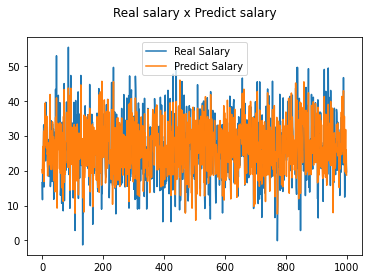

In [16]:
plt.plot(df['salary'], label='Real Salary')
plt.plot(df['yhat'], label='Predict Salary')
plt.title('Real salary x Predict salary\n')
plt.legend()
plt.show()

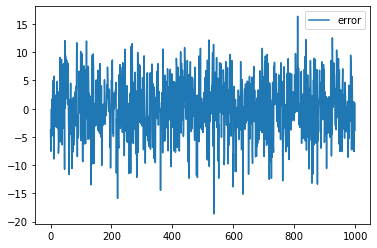

In [17]:
plt.plot(df['error'], label='error')
plt.legend(loc='best')
plt.show()

<h1>Apply Regression Linear for Machine Learning</h1>

Protocol for applying Machine Learning

1. Buiding dataset $X$ and $Y$ 
2. Split dataset for training and testing
3. Sometimes is necessary to normalizer, standardizer or scaler of dataset
4. Building of model
5. Training of model
6. Prediction of model
7. Avaliable of model
8. Building the linear equation

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

<h3>1. Buiding dataset $X$ and $Y$</h3>

In [46]:
df.columns

Index(['time', 'salary', 'yhat', 'error'], dtype='object')

In [55]:
X = df.iloc[:,:1].values

In [56]:
y = df.iloc[:,-3:2].values

In [61]:
X.shape, y.shape

(1000, 1)

<h3>2. Split dataset for training and testing</h3>

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=151120,
                                                   test_size=0.3)

In [81]:
print("Train:")
print(X_train.shape)
print(y_train.shape)

print("Test:")
print(X_test.shape)
print(y_test.shape)

Train:
(700, 1)
(700, 1)
Test:
(300, 1)
(300, 1)


<h3>3. Sometimes is necessary to normalizer, standardizer or scaler of dataset</h3>

<h3>4. Building of model</h3>

In [75]:
model = LinearRegression()

<h3>5. Training of model</h3>

In [76]:
model.fit(X_train, y_train)

LinearRegression()

$y_i = \beta_0 + \beta_1*X_i + \varepsilon$

In [85]:
beta_1 = model.coef_
beta_0 = model.intercept_

print(f'inclination:{beta_1}')
print(f'intercept:{beta_0}')

inclination:[[0.81589307]]
intercept:[5.40142132]


<h3>5.1 Straight line </h3>

$f(time) = \beta_o + \beta_1*time+\varepsilon$

$salary = \beta_o + \beta_1*time+\varepsilon$

In [100]:
print('Equation of training:\n')

print(f'salary = {beta_0} + {beta_1[0]}*time')

Equation of training:

salary = [5.40142132] + [0.81589307]*time


<h3>5.2 Plot of training</h3>

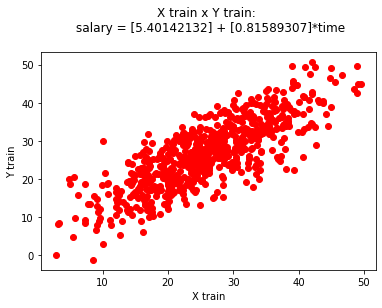

In [166]:
plt.scatter(X_train, y_train, color = 'red')
# plt.plot(X_train, model.predict(X_train), color = 'blue') # model.predict(X_train) ==> y_train_predict
plt.title(f'X train x Y train: \n salary = {beta_0} + {beta_1[0]}*time\n')
plt.xlabel('X train')
plt.ylabel('Y train')
plt.show()

<h3>5.3 Prediction of training </h3>

In [169]:
y_train_predict = model.predict(X_train)

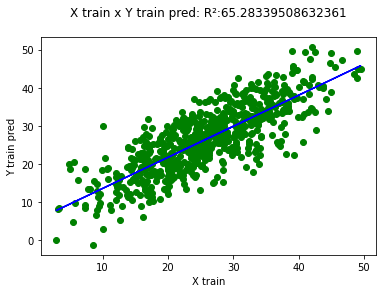

In [178]:
plt.scatter(X_train, y_train, color='g')
plt.plot(X_train, y_train_predict, color = 'blue') # model.predict(X_train) ==> y_train_predict
plt.title(f'X train x Y train pred: R²:{r2_score(y_train, y_train_predict)*100}\n')
plt.xlabel('X train')
plt.ylabel('Y train pred')
plt.show()

In [147]:
from sklearn.metrics import r2_score

print(f'{r2_score(y_train, y_train_pred)*100}')

65.28339508632361


<h3>6. Prediction of test</h3>

In [78]:
# Here we are using the X_test

y_pred = model.predict(X_test)

y_pred.shape

(300, 1)

In [155]:
print(f'{r2_score(y_test, y_pred)*100}')

66.26768778387483


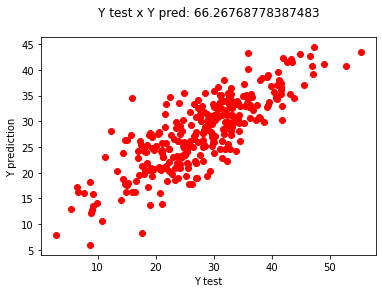

In [157]:
plt.scatter(y_test, y_pred,color='r')
plt.title(f'Y test x Y pred: {r2_score(y_test, y_pred)*100}\n')
plt.xlabel('Y test')
plt.ylabel('Y prediction')
plt.show()

<h3>7. Avaliable of model</h3>

<h3>8. Building the linear equation</h3>